In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [187]:
# 파일 경로 설정
file_paths = ['2018_01-2021_04.csv','2021-05.csv','2021-06.csv','2021-07.csv','2021-08.csv','2021-09.csv','2021-10.csv','2021-11.csv']

# 파일들을 읽어들여 데이터프레임으로 변환하여 리스트에 저장
df_list = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    df_list.append(df)

# 모든 데이터프레임을 하나로 합치기
train_df = pd.concat(df_list, ignore_index=True)

# 결과 확인
print(train_df)

      ANALS_TRGET_YEAR  ANALS_TRGET_MT ONE_AREA_NM TWO_AREA_NM  ALL_BOOK_CO  \
0                 2018               1         강원도         강릉시       412082   
1                 2018               1         강원도         동해시       301625   
2                 2018               1         강원도         삼척시       280583   
3                 2018               1         강원도         속초시       460050   
4                 2018               1         강원도         양구군       147476   
...                ...             ...         ...         ...          ...   
9852              2021              11        충청북도     청주시 상당구       569170   
9853              2021              11        충청북도     청주시 서원구       770079   
9854              2021              11        충청북도     청주시 청원구       419113   
9855              2021              11        충청북도     청주시 흥덕구       546734   
9856              2021              11        충청북도         충주시       261499   

      NEW_BOOK_CO   LON_CO  
0             153  141

In [160]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ANALS_TRGET_YEAR  9857 non-null   int64  
 1   ANALS_TRGET_MT    9857 non-null   int64  
 2   ONE_AREA_NM       9857 non-null   object 
 3   TWO_AREA_NM       9857 non-null   object 
 4   ALL_BOOK_CO       9857 non-null   int64  
 5   NEW_BOOK_CO       9857 non-null   int64  
 6   LON_CO            9654 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 539.2+ KB


In [188]:
train_df.drop(['ONE_AREA_NM','TWO_AREA_NM'],axis=1,inplace=True)

In [228]:
train_df.head(5)

,ANALS_TRGET_YEAR,ANALS_TRGET_MT,ALL_BOOK_CO,NEW_BOOK_CO,LON_CO
0,2018,1,412082,153,14100
1,2018,1,301625,648,16911
2,2018,1,280583,343,9707
3,2018,1,460050,1395,18808
4,2018,1,147476,127,5214


## LON_CO의 NULL 값 치환

In [190]:
train_df['LON_CO'].isna().sum()

203

In [198]:
train_df['LON_CO'].apply(lambda x : x == 100).sum()

0

In [196]:
train_df['LON_CO'].fillna(100,inplace=True)

In [197]:
def null_processing(column):
    if column == 100:        
        condition_2018 = (train_df['ANALS_TRGET_YEAR'] == 2018) & (train_df['ANALS_TRGET_MT'].isin([1,2,3,4,5,6,7,8,9,10,11,12]))
        condition_2019 = (train_df['ANALS_TRGET_YEAR'] == 2019) & (train_df['ANALS_TRGET_MT'].isin([1,2,3,4,5,6,7,8,9,10,11,12]))
        condition_2020 = (train_df['ANALS_TRGET_YEAR'] == 2020) & (train_df['ANALS_TRGET_MT'].isin([1,2,3,4,5,6,7,8,9,10,11,12]))
        condition_2021 = (train_df['ANALS_TRGET_YEAR'] == 2021) & (train_df['ANALS_TRGET_MT'].isin([1,2,3,4,5,6,7,8,9,10,11,12]))
        
        if condition_2018.any():
            return train_df.loc[condition_2018, column].mean()
        elif condition_2019.any():
            return train_df.loc[condition_2019, column].mean()
        elif condition_2020.any():
            return train_df.loc[condition_2020, column].mean()
        elif condition_2021.any():
            return train_df.loc[condition_2021, column].mean()

    return column

train_df['LON_CO'] = train_df['LON_CO'].apply(lambda x : null_processing(x))

In [204]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ANALS_TRGET_YEAR  9857 non-null   int64
 1   ANALS_TRGET_MT    9857 non-null   int64
 2   ALL_BOOK_CO       9857 non-null   int64
 3   NEW_BOOK_CO       9857 non-null   int64
 4   LON_CO            9857 non-null   int64
dtypes: int64(5)
memory usage: 385.2 KB


In [203]:
train_df['LON_CO']=train_df.LON_CO.astype('int64')

## LON_CO 시각화 (도서대출권수)

In [208]:
LON_CO_pivot = train_df.groupby(['ANALS_TRGET_MT', 'ANALS_TRGET_YEAR'])['LON_CO'].mean().reset_index().pivot(index='ANALS_TRGET_MT', columns='ANALS_TRGET_YEAR', values='LON_CO')
LON_CO_pivot

ANALS_TRGET_YEAR,2018,2019,2020,2021
ANALS_TRGET_MT,,,,
1,44427.380000,42466.073171,40102.156863,34272.810000
2,32361.191176,36235.405797,27278.928230,34899.317073
3,37868.674757,41566.743961,5056.942029,33864.112676
4,36892.688995,37903.957547,9621.859155,29434.995192
5,36141.642857,35778.559242,25348.776190,33868.980861
6,36091.933333,37830.733333,16391.542453,37018.594203
7,43369.985714,43059.537736,28007.386792,92161.790476
8,45455.387560,46503.311005,27285.995283,43400.354839
9,37300.381643,36952.057692,13684.909524,37462.334884


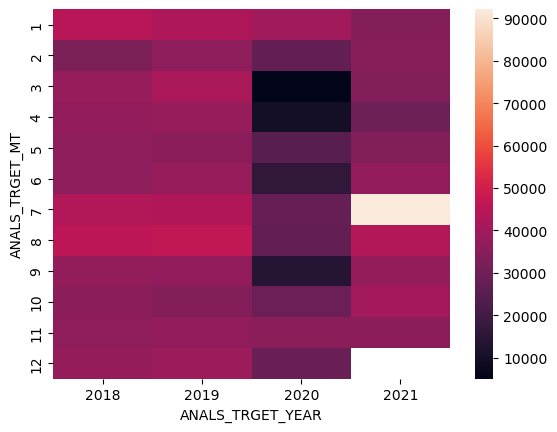

In [209]:
sns.heatmap(data=LON_CO_pivot);

## 	NEW_BOOK_CO 시각화 (신규도서)

In [230]:
NEW_BOOK_CO_pivot = train_df.groupby(['ANALS_TRGET_MT', 'ANALS_TRGET_YEAR'])['NEW_BOOK_CO'].mean().reset_index().pivot(index='ANALS_TRGET_MT',columns='ANALS_TRGET_YEAR', values='NEW_BOOK_CO')
NEW_BOOK_CO_pivot

ANALS_TRGET_YEAR,2018,2019,2020,2021
ANALS_TRGET_MT,,,,
1,1808.735000,2125.346341,1800.073529,1153.845000
2,2594.823529,2183.169082,2266.473684,1693.765854
3,4316.184466,3035.367150,3848.260870,3002.708920
4,3169.550239,3360.575472,3291.009390,2835.081731
5,3190.119048,2991.753555,3359.661905,2532.832536
6,3394.071429,3392.761905,3952.655660,3439.405797
7,3017.585714,3252.240566,3146.896226,4751.471429
8,2573.377990,2622.043062,2139.924528,2236.447005
9,2412.956522,2304.120192,2667.557143,2008.520930


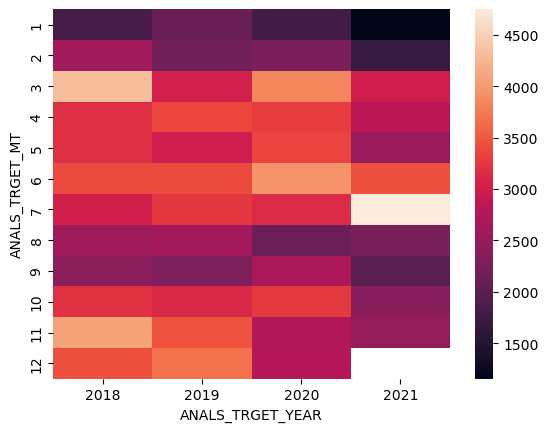

In [232]:
sns.heatmap(data=NEW_BOOK_CO_pivot);